In [1]:
# from piglet.model.interact.dataloader import _decode_record
import tensorflow as tf
import pandas as pd

pd.set_option('display.max_columns', None)

IMAGE_HEIGHT = 384
IMAGE_WIDTH = 640

In [2]:
from PIL import Image

def show_image(i, j=0):
    img = Image.open(f"data/{i}/{j}.jpeg")
    display(img)

In [4]:
from piglet.data.thor_constants import THOR_AFFORDANCES

_keys_to_features = {
    "actions/action_args": tf.io.VarLenFeature(tf.int64),
    "actions/action_id": tf.io.FixedLenFeature((), tf.int64, 1),
    "actions/action_success": tf.io.FixedLenFeature((), tf.int64, 1),
    "agent_state": tf.io.VarLenFeature(tf.float32),
    "comparison_labels": tf.io.VarLenFeature(tf.int64),
    "meta": tf.io.FixedLenFeature((), tf.string, default_value=""),
    "objects/ObjectTemperature": tf.io.VarLenFeature(tf.int64),
    "objects/breakable": tf.io.VarLenFeature(tf.int64),
    "objects/canBeUsedUp": tf.io.VarLenFeature(tf.int64),
    "objects/canFillWithLiquid": tf.io.VarLenFeature(tf.int64),
    "objects/cookable": tf.io.VarLenFeature(tf.int64),
    "objects/dirtyable": tf.io.VarLenFeature(tf.int64),
    "objects/distance": tf.io.VarLenFeature(tf.int64),
    "objects/isBroken": tf.io.VarLenFeature(tf.int64),
    "objects/isCooked": tf.io.VarLenFeature(tf.int64),
    "objects/isDirty": tf.io.VarLenFeature(tf.int64),
    "objects/isFilledWithLiquid": tf.io.VarLenFeature(tf.int64),
    "objects/isOpen": tf.io.VarLenFeature(tf.int64),
    "objects/isPickedUp": tf.io.VarLenFeature(tf.int64),
    "objects/isSliced": tf.io.VarLenFeature(tf.int64),
    "objects/isToggled": tf.io.VarLenFeature(tf.int64),
    "objects/isUsedUp": tf.io.VarLenFeature(tf.int64),
    "objects/mass": tf.io.VarLenFeature(tf.int64),
    "objects/moveable": tf.io.VarLenFeature(tf.int64),
    "objects/object_types": tf.io.VarLenFeature(tf.int64),
    "objects/openable": tf.io.VarLenFeature(tf.int64),
    "objects/pickupable": tf.io.VarLenFeature(tf.int64),
    "objects/receptacle": tf.io.VarLenFeature(tf.int64),
    "objects/parentReceptacles": tf.io.VarLenFeature(tf.int64),
    "objects/receptacleObjectIds": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Ceramic": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Fabric": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Food": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Glass": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Leather": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Metal": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Organic": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Paper": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Plastic": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Rubber": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Soap": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Sponge": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Stone": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Wax": tf.io.VarLenFeature(tf.int64),
    "objects/salientMaterials_Wood": tf.io.VarLenFeature(tf.int64),
    "objects/size": tf.io.VarLenFeature(tf.int64),
    "objects/sliceable": tf.io.VarLenFeature(tf.int64),
    "objects/toggleable": tf.io.VarLenFeature(tf.int64),
    "frames/encoded": tf.io.FixedLenFeature((), tf.string, default_value=""),
    "frames/format": tf.io.FixedLenFeature((), tf.string, default_value=""),
    "frames/height": tf.io.FixedLenFeature((), tf.int64, 1),
    "frames/key/sha256": tf.io.FixedLenFeature((), tf.string, default_value=""),
    "frames/num_frames": tf.io.FixedLenFeature((), tf.int64, 1),
    "frames/width": tf.io.FixedLenFeature((), tf.int64, 1),
    "is_real_example": tf.io.FixedLenFeature(
        (), tf.int64, 0
    ),  # Only needed for the turk stuff
    "ids/pre_act2post": tf.io.VarLenFeature(tf.int64),  # Only needed for the turk stuff
    "ids/post_act2pre": tf.io.VarLenFeature(tf.int64),  # Only needed for the turk stuff
    "ids/pre": tf.io.VarLenFeature(tf.int64),  # Only needed for the turk stuff
    "ids/post": tf.io.VarLenFeature(tf.int64),  # Only needed for the turk stuff
    "ids/_extrasignal": tf.io.VarLenFeature(tf.int64),  # Only needed for the turk stuff
}

names_and_arities = []
for name_i, arity_i, _ in THOR_AFFORDANCES:
    if f"objects/{name_i}" in _keys_to_features.keys():
        if not name_i in ("canFillWithLiquid", "canBeUsedUp"):
            names_and_arities.append((name_i, arity_i))
names_and_arities = sorted(names_and_arities, key=lambda x: (-x[1], x[0]))
print(names_and_arities)

[('parentReceptacles', 126), ('receptacleObjectIds', 126), ('distance', 8), ('mass', 8), ('size', 8), ('ObjectTemperature', 3), ('breakable', 1), ('cookable', 1), ('dirtyable', 1), ('isBroken', 1), ('isCooked', 1), ('isDirty', 1), ('isFilledWithLiquid', 1), ('isOpen', 1), ('isPickedUp', 1), ('isSliced', 1), ('isToggled', 1), ('isUsedUp', 1), ('moveable', 1), ('openable', 1), ('pickupable', 1), ('receptacle', 1), ('salientMaterials_Ceramic', 1), ('salientMaterials_Fabric', 1), ('salientMaterials_Food', 1), ('salientMaterials_Glass', 1), ('salientMaterials_Leather', 1), ('salientMaterials_Metal', 1), ('salientMaterials_Organic', 1), ('salientMaterials_Paper', 1), ('salientMaterials_Plastic', 1), ('salientMaterials_Rubber', 1), ('salientMaterials_Soap', 1), ('salientMaterials_Sponge', 1), ('salientMaterials_Stone', 1), ('salientMaterials_Wax', 1), ('salientMaterials_Wood', 1), ('sliceable', 1), ('toggleable', 1)]


In [5]:
import tf_slim as slim

slim_example_decoder = slim.tfexample_decoder

# # Handle the image things separately
_items_to_handlers = {
    k: (slim_example_decoder.Tensor(k)) for k in _keys_to_features.keys()
}

_items_to_handlers["frames"] = slim_example_decoder.Image(
    image_key=f"frames/encoded", format_key=f"frames/format", channels=3
)

In [6]:
def _decode_record(record):
    """Decodes serialized tensorflow example and returns a tensor dictionary. See keys_to_features for arguments"""
    serialized_example = tf.reshape(record, shape=[])

    decoder = slim_example_decoder.TFExampleDecoder(_keys_to_features, _items_to_handlers)
    keys = sorted(decoder.list_items())

    tensors = decoder.decode(serialized_example, items=keys)
    tensor_dict = dict(zip(keys, tensors))

    # if use_vision:
    tensor_dict["frames"] = tf.reshape(
        tensor_dict["frames"], [-1, IMAGE_HEIGHT, IMAGE_WIDTH, 3]
    )

    for k in tensor_dict:
        if tensor_dict[k].dtype == tf.int64:
            tensor_dict[k] = tf.cast(tensor_dict[k], tf.int32)

    return tensor_dict

In [21]:
from piglet.model.model_utils import get_shape_list, encode_string, normalize_image
from piglet.model.model_utils import pad_to_fixed_size as p2fsz
import json

def _dataset_parser(
    value,
    NUM_OBJECTS=4,
    max_lang_seq_length=64,
):
    """

    :param value: TFRecord to decode
    :param is_training:
    :return:
    """
    with tf.name_scope("parser"):
        data = _decode_record(value)
        features = {
            "meta": data["meta"],
            "actions/action_id": data["actions/action_id"],
            "actions/action_success": data["actions/action_success"],
            "actions/action_args": p2fsz(
                data["actions/action_args"],
                pad_value=0,
                output_shape=[NUM_OBJECTS // 2],
                axis=0,
                truncate=True,
            ),
            "agent_state": p2fsz(
                data["agent_state"],
                pad_value=0,
                output_shape=[6],
                axis=0,
                truncate=True,
            ),
        }
        features["frames/frames"] = data["frames"]

        # Object states -------------------------------------------------
        features["objects/object_types"] = p2fsz(
            data["objects/object_types"],
            pad_value=0,
            output_shape=[NUM_OBJECTS],
            axis=0,
            truncate=True,
        )
        features["objects/is_valid"] = tf.cast(
            tf.greater(features["objects/object_types"], 0), dtype=tf.int32
        )

        # [o1   o1    o2   o2  ]
        # [pre, post, pre, post]
        obj_states = []
        for name_i, arity_i in names_and_arities:
            print(f"{name_i:>40s} {arity_i}")

            with tf.name_scope(f"convert_{name_i}"):
                raw = p2fsz(
                    data[f"objects/{name_i}"],
                    pad_value=0,
                    output_shape=[NUM_OBJECTS],
                    axis=0,
                    truncate=True,
                )
                obj_states.append(raw)

        # [num_objs, num_obj_states]
        obj_states = tf.stack(obj_states, 1)

        features["objects/object_states"] = obj_states

        print("Feature summary!")
        for k, v in sorted(features.items(), key=lambda x: x[0]):
            print("{}: {}".format(k, get_shape_list(v)))

        return features

In [22]:
import glob

train = glob.glob("physical-interaction-tfrecords/train-*")
val = glob.glob("physical-interaction-tfrecords/val-*")

In [23]:
train_dataset = tf.data.TFRecordDataset(
    train, compression_type=None, buffer_size=None, num_parallel_reads=None
)

decoded_train = train_dataset.map(
    lambda x: _dataset_parser(
        x, max_lang_seq_length=64
    )
)


val_dataset = tf.data.TFRecordDataset(
    val, compression_type=None, buffer_size=None, num_parallel_reads=None
)

decoded_val = val_dataset.map(
    lambda x: _dataset_parser(
        x, max_lang_seq_length=64
    )
)

                       parentReceptacles 126
                     receptacleObjectIds 126
                                distance 8
                                    mass 8
                                    size 8
                       ObjectTemperature 3
                               breakable 1
                                cookable 1
                               dirtyable 1
                                isBroken 1
                                isCooked 1
                                 isDirty 1
                      isFilledWithLiquid 1
                                  isOpen 1
                              isPickedUp 1
                                isSliced 1
                               isToggled 1
                                isUsedUp 1
                                moveable 1
                                openable 1
                              pickupable 1
                              receptacle 1
                salientMaterials_Ceramic 1
       

# Save dataset as images and csv

## Training set

In [26]:
import os
from PIL import Image
from piglet.data.thor_constants import numpy_to_instance
import pandas as pd 
from tqdm import tqdm

instances = []
i = 0 
for element in tqdm(decoded_train.as_numpy_iterator(), total=278009):
    # continue # uncomment to run 
#     instance, post_instance = numpy_to_instance(element, add_post_conditions=True)
#     for k, v in post_instance.items():
#         instance[f"post_{k}"] = v
        
#     elem_meta = json.loads(element["meta"])
#     instance["id"] = elem_meta["fn"].split("/")[-1].split(".")[0]
#     instance["text"] = elem_meta["text"]
    
#     diff = abs((element["frames/frames"][0]/255) - (element["frames/frames"][1]/255))
#     max_change = diff.max()
#     num_change = (diff > 0).sum()
#     instance["max_change"] = max_change
#     instance["num_change"] = num_change
        
#     instance["action_success"] = element["actions/action_success"] 
#     instances.append(instance)
    
    # os.mkdir(f"data/train", exists=)
    for j in [0,1]:
        im = Image.fromarray(element["frames/frames"][j])
        im.save(f"data/train/{i}_{j}.jpeg")
        
    i+=1

# df = pd.DataFrame(instances)
# df.to_csv("piglet_train.csv", index=False)

100%|█████████████████████████████████████████████████████████| 278009/278009 [51:00<00:00, 90.84it/s]


## Validation set

In [25]:
import os
from PIL import Image
from piglet.data.thor_constants import numpy_to_instance
import pandas as pd 
from tqdm import tqdm

# instances = []
i = 0 
for element in tqdm(decoded_val.as_numpy_iterator(), total=33042):
    # continue # comment to run 
    # instance, post_instance = numpy_to_instance(element, add_post_conditions=True)
    # for k, v in post_instance.items():
    #     instance[f"post_{k}"] = v
        
#     elem_meta = json.loads(element["meta"])
#     instance["id"] = elem_meta["fn"].split("/")[-1].split(".")[0]
#     instance["text"] = elem_meta["text"]
    
#     diff = abs((element["frames/frames"][0]/255) - (element["frames/frames"][1]/255))
#     max_change = diff.max()
#     num_change = (diff > 0).sum()
#     instance["max_change"] = max_change
#     instance["num_change"] = num_change
        
#     instance["action_success"] = element["actions/action_success"] 
#     instances.append(instance)
    
    # os.mkdir(f"data/val/{i}")
    for j in [0,1]:
        im = Image.fromarray(element["frames/frames"][j])
        im.save(f"data/val/{i}_{j}.jpeg")
        
    i+=1

# df_val = pd.DataFrame(instances)
# df.to_csv("piglet_val.csv", index=False)

 97%|█████████████████████████████████████████████████████████▏ | 32042/33042 [05:53<00:11, 90.66it/s]


## Process annotated set from jsonlines file

In [33]:
import jsonlines
import json
from copy import deepcopy
from PIL import Image
import os
from pathlib import Path

annotated_dataset = []
with jsonlines.open("piglet/data/annotations.jsonl") as reader:
    for i, obj in tqdm(enumerate(reader), total=2000):
        # continue # comment out to run below
        instance = deepcopy(obj["pre"])
#         for k, v in obj["post"].items():
#             instance[f"post_{k}"] = v            

#         instance["original_zero_shot"] = obj["is_zs"]
#         instance["text"] = obj["meta"]["text"]
#         split = obj["split"]
#         instance["split"] = split
        
#         file_path = f"data/mturk/{obj['slug']}"
#         Path(f"data/annotated/{split}/{i}").mkdir(parents=True, exist_ok=True)

#         frames = []
#         for j in [0,1]:
#             img_path = f"{file_path}/img{j}.jpg"        
#             im = Image.open(img_path)
#             frames.append(np.asarray(im)/255)
#             im.save(f"data/annotated/{split}/{i}/{j}.jpeg")
            
#         diff = abs(frames[0] - frames[1])
#         max_change = diff.max()
#         num_change = (diff > 0).sum()
#         instance["max_change"] = max_change
#         instance["num_change"] = num_change
            
#         for k in ["precondition_language", "action_language", "postcondition_language"]:
#             instance[f"annotator0_{k}"] = obj["annot"][k]
#             instance[f"annotator1_{k}"] = obj["extra_annot0"][k]
#             instance[f"annotator2_{k}"] = obj["extra_annot1"][k]
            
        annotated_dataset.append(instance)
        
len(annotated_dataset)

# annotated_dataset = pd.DataFrame(annotated_dataset)
# annotated_dataset["index"] = annotated_dataset.index
# annotated_dataset.to_csv("annotated.csv", index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 8677.17it/s]


2000

In [43]:
# glob.glob("data/annotated/*")
import numpy as np
a = np.load('data/annotated/objects_test.npy')
b = np.load('data/annotated/objects_train.npy')
c = np.load('data/annotated/objects_val.npy')

a.shape[0] + b.shape[0] + c.shape[0]

1586

# Analyse image statistics

In [ ]:
import pandas as pd
df = pd.read_csv("piglet.csv")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="max_change")
plt.show()
sns.displot(data=df, x="num_change")
sns.displot(data=df, x="num_change", y="max_change")
plt.show()

In [22]:
df = train_df

In [23]:
print(len(df[df["max_change"] <= 0.2]) / len(df))
# print(len(df[df["num_change"] > 400000]) / len(df))
# print(len(df[(df["num_change"] > 400000)|(df["max_change"] <= 0.2)]) / len(df))

0.0780909970540522


In [27]:
df[df["max_change"] <= 0.2].Action0.value_counts()

ToggleObjectOn           10898
EmptyLiquidFromObject     2924
ToggleObjectOff           2717
HeatUpPan                 2254
DirtyObject               1851
SliceObject                801
OpenObject                  84
PickupObject                83
PutObject                   70
CloseObject                 28
Name: Action0, dtype: int64

In [ ]:
from matplotlib.pyplot import figure
import seaborn as sns

df["outlier"] = 0
df.loc[(df["num_change"] > 400000)|(df["max_change"] <= 0.2), "outlier"] = 1
df["outlier"] = df["outlier"].astype("category")
df["Action0"] = df["Action0"].astype("category")

In [ ]:
p = sns.displot(data=df, x="Action0", hue="outlier")
plt.gcf().set_size_inches(30, 20)
plt.show()

## Clean outliers from train/val/annotated datasets

In [9]:
import pandas as pd
# Get datasets
train_df = pd.read_csv("piglet_train.csv")
val_df = pd.read_csv("piglet_val.csv")
annotated_df = pd.read_csv("annotated.csv",  lineterminator='\n')

In [10]:
# train_df.action_success.value_counts()

In [11]:
def exclude_outliers(df):
    # label outliers that match a certain filter
    # df["outlier"] = 0
    # df.loc[(df["num_change"] > 400000)|(df["max_change"] <= 0.2), "outlier"] = 1
    # df["outlier"] = df["outlier"].astype("category")
    # exclude useless columns (always False)
    df.drop(columns=['isUsedUp0', 'isUsedUp1', 'post_isUsedUp0', 'post_isUsedUp1', 
                      'post_salientMaterials_Organic0', 'post_salientMaterials_Organic1', 
                     'salientMaterials_Organic0', 'salientMaterials_Organic1'], inplace=True)
    # select non-outliers
    # if "action_success" in set(df.columns.values):
        # return df[(df.outlier == 0)&(df["action_success"] == 1)].copy()
    # return df[df.outlier == 0].copy()
    return df

clean_train_df = exclude_outliers(train_df)
clean_train_df["index"] = clean_train_df.index
clean_train_df["train"] = 1

# select non-outliers and exclude useless columns (allways False)
clean_val_df = exclude_outliers(val_df)
clean_val_df["index"] = clean_val_df.index
clean_val_df["train"] = 0

# select non-outliers and exclude useless columns (allways False)
clean_annotated_df = exclude_outliers(annotated_df)

In [12]:
# clean_train_df.to_csv("piglet_clean_train.csv", index=False)
# clean_val_df.to_csv("piglet_clean_val.csv", index=False)
# clean_annotated_df.to_csv("annotated_clean.csv", index=False)

## Preprocess dataset

We preprocess the dataset to vectorise the object and action attributes into two separate vectors for each respective dataset (train and validationdf)

In [13]:
# column names relevant to objects
names = [
         'ObjectName',
         'parentReceptacles',
         'receptacleObjectIds',
         'distance',
         'mass',
         'size',
         'ObjectTemperature',
         'breakable',
         'cookable',
         'dirtyable',
         'isBroken',
         'isCooked',
         'isDirty',
         'isFilledWithLiquid',
         'isOpen',
         'isPickedUp',
         'isSliced',
         'isToggled',
         'moveable',
         'openable',
         'pickupable',
         'receptacle',
         'salientMaterials_Ceramic',
         'salientMaterials_Fabric',
         'salientMaterials_Food',
         'salientMaterials_Glass',
         'salientMaterials_Leather',
         'salientMaterials_Metal',
         'salientMaterials_Paper',
         'salientMaterials_Plastic',
         'salientMaterials_Rubber',
         'salientMaterials_Soap',
         'salientMaterials_Sponge',
         'salientMaterials_Stone',
         'salientMaterials_Wax',
         'salientMaterials_Wood',
         'sliceable',
         'toggleable']
len(names)

38

In [14]:
# train_df = pd.read_csv("piglet_clean_train.csv")
# train_df.columns
full_names = []
for n in names:
    obj0 = f"{n}0"
    obj1 = f"{n}1"
    obj0_post = f"post_{n}0"
    obj1_post = f"post_{n}1"
    full_names.append(obj0)
    full_names.append(obj1)
    full_names.append(obj0_post)
    full_names.append(obj1_post)
    
set(train_df.columns) - set(full_names)

{'Action0',
 'ActionObject0',
 'ActionReceptacle0',
 'action_success',
 'id',
 'index',
 'is_real_example',
 'max_change',
 'num_change',
 'text',
 'train'}

In [15]:
# train_df = pd.read_csv("piglet_clean_train.csv")
# val_df = pd.read_csv("piglet_clean_val.csv")
# annotated_df = pd.read_csv("annotated_clean.csv",  lineterminator='\n')

df = pd.concat([clean_train_df, clean_val_df, clean_annotated_df])

# Action Arguments need to be the actual objects rather than the Object1/Object2
df["ActionObject"] = "None"
df.loc[df.ActionObject0 == "Object1", "ActionObject"] = df.loc[df.ActionObject0 == "Object1", "ObjectName0"]
df.loc[df.ActionObject0 == "Object2", "ActionObject"] = df.loc[df.ActionObject0 == "Object2", "ObjectName1"]

df["ActionReceptacle"] = "None"
df.loc[df.ActionReceptacle0 == "Object1", "ActionReceptacle"] = df.loc[df.ActionReceptacle0 == "Object1", "ObjectName0"]
df.loc[df.ActionReceptacle0 == "Object2", "ActionReceptacle"] = df.loc[df.ActionReceptacle0 == "Object2", "ObjectName1"]

# add temporary useless columns to simplify code later
df["ObjectName0_post"] = df["ObjectName0"]
df["ObjectName1_post"] = df["ObjectName1"]

In [16]:
# double checking that certain attributes like temperature don't appear as the only change
change_obj0 = (df[[f"post_{c}0" for c in names]].values != df[[f"{c}0" for c in names]].values)
change_obj1 = (df[[f"post_{c}1" for c in names]].values != df[[f"{c}1" for c in names]].values)

change_obj0_sum = change_obj0.sum(0)
change_obj1_sum = change_obj1.sum(0)

nochange_0 = (change_obj0.sum(1) == 0)
nochange_1 = (change_obj1.sum(1) == 0)

In [17]:
# @NOTE Should we remove temperature altogether?
temp_obj0_only = ((change_obj0[:,:6].sum(1)+change_obj0[:,7:].sum(1) == 0)*(change_obj0[:,6]))
temp_obj1_only = ((change_obj1[:,:6].sum(1)+change_obj1[:,7:].sum(1) == 0)*(change_obj1[:,6]))

# apparently no example where temperature change is the only change
print((temp_obj0_only * nochange_1).sum())
print((temp_obj1_only * nochange_0).sum())

16
11


In [18]:
from tqdm import tqdm

cols = set(df.columns)
obj0_attributes_pre = []
obj1_attributes_pre = []
obj0_attributes_post = []
obj1_attributes_post = []

object_mapper = {}
reverse_object_mapper = {}

df_tmp = df.copy()

# use a general index to share embedding layer
index = 0
for n, object_attribute in tqdm(enumerate(names), total=len(names)):
    obj0 = f"{object_attribute}0"
    obj1 = f"{object_attribute}1"
    obj0_post = f"post_{object_attribute}0"
    obj1_post = f"post_{object_attribute}1"
    
    # get all possible categories for this attribute
    categories = set(df[obj0].unique()).union(set(df[obj1].unique())).union(set(df[obj0_post].unique())).union(set(df[obj1_post].unique()))
    
    index_to_category = {} 
    category_to_index = {}
    for category in categories:
        index_to_category[index] = category
        category_to_index[category] = index
        index += 1
    
    object_mapper[n] = category_to_index
    reverse_object_mapper[n] = index_to_category

    df_tmp[obj0] = df[obj0].map(category_to_index)
    obj0_attributes_pre.append(obj0)
    
    df_tmp[obj1] = df[obj1].map(category_to_index)
    obj1_attributes_pre.append(obj1)
    
    df_tmp[obj0_post] = df[obj0_post].map(category_to_index)
    obj0_attributes_post.append(obj0_post)

    df_tmp[obj1_post] = df[obj1_post].map(category_to_index)
    obj1_attributes_post.append(obj1_post)
    

100%|██████████| 38/38 [00:31<00:00,  1.19it/s]


In [19]:
reverse_object_mapper[3]

{243: 0, 244: 1, 245: 2, 246: 3, 247: 4, 248: 5, 249: 6, 250: 7}

In [20]:
action_mapper = {}
reverse_action_mapper = {}

index = 0
# for n, action in tqdm(enumerate(action_columns), total=3):
action_categories = set(df['Action0'].unique())
index_to_category = {} 
category_to_index = {}
for category in action_categories:
    index_to_category[index] = category
    category_to_index[category] = index
    index += 1

action_mapper = category_to_index
reverse_action_mapper = index_to_category
df_tmp['Action0'] = df['Action0'].map(category_to_index)
    
action_columns = ['ActionObject', 'ActionReceptacle']
for action_argument in action_columns:
    df_tmp[action_argument] = df[action_argument].map(object_mapper[0])    

In [54]:
import pickle

with open("data/reverse_object_mapping_full.pkl", "wb") as f:
    pickle.dump(reverse_object_mapper, f)

with open("data/reverse_action_mapping_full.pkl", "wb") as f:
    pickle.dump(reverse_action_mapper, f)

In [6]:
import pickle
with open("data/reverse_object_mapping_full.pkl", "rb") as f:
    r = pickle.load(f)

In [21]:
reverse_object_mapper

NameError: name 'reverse_object_mapper' is not defined

In [22]:
none_object_index = object_mapper[0]["None"]
none_object_index

55

In [149]:
# clean_val_df[clean_val_df["index"] == 3]

In [150]:
# set(clean_val_df["index"].unique()) - img_indexes


In [ ]:
# reverse_action_mapper -> embedding size: 329
# reverse_object_mapper -> embedding size: 10
# none_object_index -> 102 (this is the embedding that should be masked to zero)

In [23]:
# put action name and arg inside same vector 
# NOTE that the ActionObject and ActionReceptacle are embedded using their respective object index
action_columns = ["Action0", 'ActionObject', 'ActionReceptacle']

In [24]:
import numpy as np

objects_train = np.stack([df_tmp[df_tmp.train == 1][obj0_attributes_pre].values,
                          df_tmp[df_tmp.train == 1][obj1_attributes_pre].values,
                          df_tmp[df_tmp.train == 1][obj0_attributes_post].values,
                          df_tmp[df_tmp.train == 1][obj1_attributes_post].values], axis=1)

objects_val = np.stack([df_tmp[df_tmp.train == 0][obj0_attributes_pre].values,
                        df_tmp[df_tmp.train == 0][obj1_attributes_pre].values,
                        df_tmp[df_tmp.train == 0][obj0_attributes_post].values,
                        df_tmp[df_tmp.train == 0][obj1_attributes_post].values], axis=1)

action_train = df_tmp[df_tmp.train == 1][action_columns].values
action_val = df_tmp[df_tmp.train == 0][action_columns].values

assert action_train.shape[0] == objects_train.shape[0]
assert action_val.shape[0] == objects_val.shape[0]

In [31]:
# objects_train.shape

(278009, 4, 38)

In [32]:
# Save vectors to numpy arrays
np.save("data/img_indices_train_full.npy", train_df["index"].values)
np.save("data/img_indices_val_full.npy", val_df["index"].values)
np.save("data/objects_train_full.npy", objects_train)
np.save("data/objects_val_full.npy", objects_val)
np.save("data/actions_train_full.npy", action_train)
np.save("data/actions_val_full.npy", action_val)

In [114]:
len(df_tmp)

312051

In [50]:
np.load("data/annotated/actions_train_full.npy", allow_pickle=False)

array([[ 2, 33, 55],
       [ 5, 65, 55],
       [ 0, 65, 55],
       ...,
       [ 3, 83, 55],
       [12, 55, 55],
       [ 6, 88, 55]])

#### Save annotated set vectors

In [39]:
annotated_objects_train = np.stack([df_tmp[df_tmp["split"] == "train"][obj0_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "train"][obj1_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "train"][obj0_attributes_post].values,
                                        df_tmp[df_tmp["split"] == "train"][obj1_attributes_post].values], axis=1)

annotated_objects_val = np.stack([df_tmp[df_tmp["split"] == "val"][obj0_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "val"][obj1_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "val"][obj0_attributes_post].values,
                                        df_tmp[df_tmp["split"] == "val"][obj1_attributes_post].values], axis=1)

annotated_objects_test = np.stack([df_tmp[df_tmp["split"] == "test"][obj0_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "test"][obj1_attributes_pre].values,
                                        df_tmp[df_tmp["split"] == "test"][obj0_attributes_post].values,
                                        df_tmp[df_tmp["split"] == "test"][obj1_attributes_post].values], axis=1)

annotated_action_train = df_tmp[df_tmp["split"] == "train"][action_columns].values
annotated_action_val = df_tmp[df_tmp["split"] == "val"][action_columns].values
annotated_action_test = df_tmp[df_tmp["split"] == "test"][action_columns].values

In [45]:
# save precondition text for all three annotators for train/val/test
np.save("data/annotated/precondition_language_train_full.npy", df_tmp[df_tmp["split"] == "train"][[f"annotator{i}_precondition_language" for i in range(3)]].values)
np.save("data/annotated/precondition_language_val_full.npy", df_tmp[df_tmp["split"] == "val"][[f"annotator{i}_precondition_language" for i in range(3)]].values)
np.save("data/annotated/precondition_language_test_full.npy", df_tmp[df_tmp["split"] == "test"][[f"annotator{i}_precondition_language" for i in range(3)]].values)

# save action text for all three annotators for train/val/test
np.save("data/annotated/action_language_train_full.npy", df_tmp[df_tmp["split"] == "train"][[f"annotator{i}_action_language" for i in range(3)]].values)
np.save("data/annotated/action_language_val_full.npy", df_tmp[df_tmp["split"] == "val"][[f"annotator{i}_action_language" for i in range(3)]].values)
np.save("data/annotated/action_language_test_full.npy", df_tmp[df_tmp["split"] == "test"][[f"annotator{i}_action_language" for i in range(3)]].values)

# save postcondition text for all three annotators for train/val/test
np.save("data/annotated/postcondition_language_train_full.npy", df_tmp[df_tmp["split"] == "train"][[f"annotator{i}_postcondition_language" for i in range(3)]].values)
np.save("data/annotated/postcondition_language_val_full.npy", df_tmp[df_tmp["split"] == "val"][[f"annotator{i}_postcondition_language" for i in range(3)]].values)
np.save("data/annotated/postcondition_language_test_full.npy", df_tmp[df_tmp["split"] == "test"][[f"annotator{i}_postcondition_language" for i in range(3)]].values)

In [43]:
# save image indices
np.save("data/annotated/img_indices_train_full.npy", df_tmp[df_tmp["split"] == "train"]["index"].values)
np.save("data/annotated/img_indices_val_full.npy", df_tmp[df_tmp["split"] == "val"]["index"].values)
np.save("data/annotated/img_indices_test_full.npy", df_tmp[df_tmp["split"] == "test"]["index"].values)

# save vectors for objects and actions
np.save("data/annotated/objects_train_full.npy", annotated_objects_train)
np.save("data/annotated/objects_val_full.npy", annotated_objects_val)
np.save("data/annotated/objects_test_full.npy", annotated_objects_test)
np.save("data/annotated/actions_train_full.npy", annotated_action_train)
np.save("data/annotated/actions_val_full.npy", annotated_action_val)
np.save("data/annotated/actions_test_full.npy", annotated_action_test)

In [122]:
annotated_action_val.shape

(500, 2)

In [ ]:
# Cleanup unused images
# train_indices = set(train_df["index"].values)
# files = glob.glob("data/train/*")
# for file in tqdm(files):
#     if int(file.split("/")[-1]) not in train_indices:
#         shutil.rmtree(file)

# val_indices = set(val_df["index"].values)
# files = glob.glob("data/val/*")
# for file in tqdm(files):
#     if int(file.split("/")[-1]) not in val_indices:
#         shutil.rmtree(file)

# Calculate Image statistics

In [ ]:
all_images = glob.glob("data/train/*/*.jpeg") + glob.glob("data/annotated/*/*/*.jpeg") + glob.glob("data/val/*/*.jpeg")

In [ ]:
import matplotlib.pyplot as plt
import torch

MEAN = torch.tensor([0.49458119, 0.43375753, 0.34601003])
STD = torch.tensor([0.19409628, 0.19771467, 0.19638838])


def normalize_image(image):
    normed = torch.from_numpy(image).clone()
    normed = normed.permute(-1, 0, 1)
    normed = (normed - MEAN[:, None, None]) / STD[:, None, None]
    return normed


def denormalize_image(image):
    denormed = image * STD[:, None, None] + MEAN[:, None, None]
    denormed = denormed.permute(1, 2, 0)
    return denormed


unnorm_1 = (np.asarray(Image.open("data/train/1/0.jpeg"))/255)
plt.imshow(unnorm_1)
plt.show()

norm_1 = normalize_image(unnorm_1)
norm_1_channel_last = norm_1.permute(1, 2, 0)
plt.imshow(norm_1_channel_last)
plt.show()

norm_1_channel_last.min()
unnorm_1 = denormalize_image(norm_1)
plt.imshow(unnorm_1)
plt.show()

In [ ]:
from PIL import Image

channels_psum = np.zeros(3)
channels_psum_sq = np.zeros(3)
for image in tqdm(all_images):
    arr = np.asarray(Image.open(image)) / 255
    channels_psum += arr.sum((0,1))
    channels_psum_sq += (arr ** 2).sum((0,1))
    
count = 384*640*len(all_images)
total_mean = channels_psum / count
total_std = np.sqrt(channels_psum_sq / count - total_mean ** 2)

In [51]:
np.load("data/objects_train.npy").shape[0] #+ np.load("data/objects_val.npy").shape[0]

239392

# Zero Shot

In [482]:
# actions_train = np.concatenate((np.load("data/actions_train.npy"), np.load("data/annotated/actions_train.npy")), axis=0)
# actions_train = np.load("data/actions_train.npy")
# actions_test = np.load("data/annotated/actions_test.npy")

In [2]:
import numpy as np
np.load("data/annotated/actions_train_full.npy")

array([[ 2, 33, 55],
       [ 5, 65, 55],
       [ 0, 65, 55],
       ...,
       [ 3, 83, 55],
       [12, 55, 55],
       [ 6, 88, 55]])

In [575]:
from collections import Counter, defaultdict
import pickle 

# action_mapping = pickle.load(open("data/reverse_action_mapping.pkl", "rb"))
# object_mapping = pickle.load(open("data/reverse_object_mapping.pkl", "rb"))

# def action_triplet_to_string(action_triplet):
#     return action_mapping[action_triplet[0]], object_mapping[0][action_triplet[1]], object_mapping[0][action_triplet[2]]

# action_triplets_train = []
# action_triplets_test = []

# for action_triplet in actions_train:
#     act = action_triplet_to_string(action_triplet)
#     action_triplets_train.append({"action": act[0], "object_0": act[1], "object_1": act[2], "arr": action_triplet})
    
# for action_triplet in actions_test:
#     act = action_triplet_to_string(action_triplet)
#     action_triplets_test.append({"action": act[0], "object_0": act[1], "object_1": act[2], "arr": action_triplet})

In [647]:
# train_df = pd.DataFrame(action_triplets_train)
# test_df = pd.DataFrame(action_triplets_test)
len(hold_out_action_object_pairs)

27

In [577]:
# 3401 examples
hold_out_objects = ['HandTowel', 'Towel', 'Plunger', 'Watch', 'CD', 'SoapBottle',
                   'Pen', 'RemoteControl', 'SoapBar', 'Box', 'Bottle', 'CreditCard',
                   'Statue', 'KeyChain']

# 3278 examples
hold_out_action_object_pairs = [('CloseObject', 'Toilet'),
                                 ('DirtyObject', 'Pan'),
                                 ('DirtyObject', 'Pot'),
                                 ('EmptyLiquidFromObject', 'Bottle'),
                                 ('EmptyLiquidFromObject', 'Pot'),
                                 ('OpenObject', 'Toilet'),
                                 ('PickupObject', 'Box'),
                                 ('PickupObject', 'CellPhone'),
                                 ('PickupObject', 'CreditCard'),
                                 ('PickupObject', 'KeyChain'),
                                 ('PutObject', 'CD'),
                                 ('PutObject', 'CreditCard'),
                                 ('PutObject', 'HandTowel'),
                                 ('PutObject', 'Laptop'),
                                 ('PutObject', 'Lettuce'),
                                 ('PutObject', 'Pen'),
                                 ('PutObject', 'Plunger'),
                                 ('PutObject', 'Pot'),
                                 ('PutObject', 'RemoteControl'),
                                 ('PutObject', 'SoapBar'),
                                 ('PutObject', 'SoapBottle'),
                                 ('PutObject', 'Statue'),
                                 ('PutObject', 'ToiletPaper'),
                                 ('PutObject', 'Towel'),
                                 ('PutObject', 'Watch'),
                                 ('ToggleObjectOff', 'CellPhone'),
                                 ('ToggleObjectOff', 'Television')]

In [533]:
# set(hold_out_action_object_pairs)

In [578]:
# c = 0
# for o in hold_out_objects:
#     c += len(train_df[(train_df["object_0"] == o)])
# print(c)
# indices = []
# for pair in hold_out_action_object_pairs:
#     if pair[1] in hold_out_objects:
#         continue
#     c += len(train_df[(train_df["action"] == pair[0])&(train_df["object_0"] == pair[1])])
#     indices += list(train_df[(train_df["action"] == pair[0])&(train_df["object_0"] == pair[1])].index.values)
# print(c)

In [579]:
# len(indices)

In [585]:
# excluded_triplets
obj_name_to_index = dict(zip(object_mapping[0].values(), object_mapping[0].keys()))
act_name_to_index = dict(zip(action_mapping.values(), action_mapping.keys()))

holdout_objects_indexes = np.array([obj_name_to_index[obj] for obj in hold_out_objects])
holdout_objects_pairs_indexes = np.array([[act_name_to_index[a], obj_name_to_index[o]] for a, o in hold_out_action_object_pairs])

In [565]:
for annotated in [False, True]:
    for split in ["val", "train"]:
        base_path = f"data"
        if annotated:
            base_path += "/annotated"
        
        img_indices_path = f"{base_path}/img_indices_{split}.npy"
        actions_path = f"{base_path}/actions_{split}.npy"
        objects_path = f"{base_path}/objects_{split}.npy"

        img_indices = np.load(img_indices_path)
        actions = np.load(actions_path)
        objects = np.load(objects_path)

        holdout_objects = (actions[:, 1].reshape(-1, 1) == holdout_objects_indexes.reshape(1, -1)).any(1)
        holdout_pairs = (actions[:, :2].reshape(-1, 1,  2) == holdout_objects_pairs_indexes.reshape(1, -1, 2)).all(axis=2).any(axis=1)
        keep = ~(holdout_objects|holdout_pairs)
        print(f"Excluding {sum(keep == False)} examples for {base_path}/{split}", )

        img_indices = img_indices[keep]
        actions = actions[keep]
        objects = objects[keep]

Excluding 739 examples for data/val
Excluding 6767 examples for data/train
Excluding 22 examples for data/annotated/val
Excluding 49 examples for data/annotated/train


In [584]:
split = "test"
actions_path = f"{base_path}/actions_{split}.npy"

print(actions_path)
actions = np.load(actions_path)

holdout_objects = (actions[:, 1].reshape(-1, 1) == np.array(holdout_objects_indexes).reshape(1, -1)).any(1)
holdout_pairs = (actions[:, :2].reshape(-1, 1,  2) == np.array(holdout_objects_pairs_indexes).reshape(1, -1, 2)).all(axis=2).any(axis=1)
zero_shot = holdout_objects|holdout_pairs

print(zero_shot.sum())
print(zero_shot.sum()/actions.shape[0])

np.save(f"{base_path}/zero_shot_test.npy", zero_shot)

data/annotated/actions_test.npy
42
0.10552763819095477


In [51]:
# zero_shot.sum
import numpy as np
import pickle


# self.object_attributes_idx_to_mapper = get_objects_mapper(data_dir_path)

with open(f"data/reverse_object_mapping.pkl", "rb") as f:
    # select first index since the first index is the objet name encoded as an int
    object_mapper =  pickle.load(f)
    
# object_mapper
# list(object_mapper[idx].values())

# min_idx = list(object_mapper[idx].keys())[0]
# class_names = list(object_mapper[idx].values())
# print(f"object_attribute_name: {object_attribute_name}")
# print(f"idx: {idx}")
# print(f"min_idx: {min_idx}")
# print(f"class_names: {class_names}")
# print(f"preds: {preds[:, idx].numpy()}")
# print(f"y_true: {labels[:, idx].numpy()}")

list(object_mapper[3].keys())[0]

# object_attribute_name: distance
# idx: 3
# min_idx: 240
# class_names: [0, 1, 2, 3, 4, 5, 6, 7]
# preds: [243 245 243 ... 246 245 243]
# y_true: [248 247 244 ... 247 247 247]

# np.load("data/annotated/seen_test.npy").shape

# np.load("data/annotated/actions_test.npy").shape[0]
# np.ones(398).astype(bool)

240

In [53]:
np.load("data/objects_train_full.npy")[:,:,3].min()

243

In [586]:
obj_name_to_index = dict(zip(object_mapping[0].values(), object_mapping[0].keys()))

In [616]:
import seaborn as sns

df = pd.read_csv("~/Downloads/aaa.csv")
df

,Actual,Predicted,_defaultColorIndex,id,nPredictions,name
0,0,0,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu
1,0,1,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu
2,0,2,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu
3,0,3,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu
4,0,4,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu
...,...,...,...,...,...,...
59,7,3,8,42_2xl68fp3,1,images_fuse_h64_l3_42_nlu
60,7,4,8,42_2xl68fp3,1,images_fuse_h64_l3_42_nlu
61,7,5,8,42_2xl68fp3,2,images_fuse_h64_l3_42_nlu
62,7,6,8,42_2xl68fp3,0,images_fuse_h64_l3_42_nlu


In [633]:
cf_matrix = np.zeros((8,8))
for i, row in df.iterrows():
    cf_matrix[row["Actual"],row["Predicted"]] = row["nPredictions"]
    
cf_matrix = cf_matrix[1:,1:]

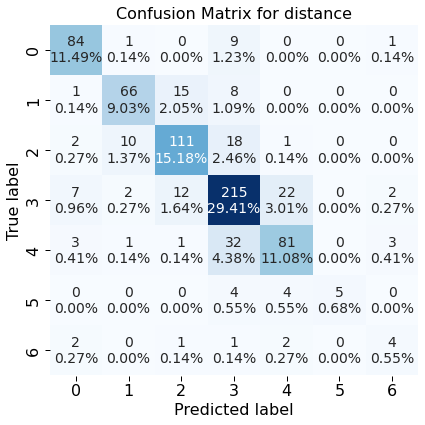

In [645]:
import seaborn as sns

fig = plt.gcf()
fig.set_size_inches(6, 6)
sns.set_context("paper")

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
      zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(cf_matrix.shape)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix for distance", fontsize=16)
plt.xlabel("Predicted label", fontsize=16)
plt.ylabel("True label", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("distance.png", dpi=300)
# plt.show()

In [ ]:
object_mapping

In [649]:
df = pd.read_csv("piglet_train.csv")

In [654]:
df["distance0"].value_counts()

4    94461
3    61080
2    46786
5    36595
1    31566
7     3911
6     3587
0       23
Name: distance0, dtype: int64